Loading the dataset

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

Exploring the dataset

In [2]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling Missing Values

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Handling duplicate values:

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

Removing redundant data:

In [10]:
df = df.drop(['alive', 'pclass', 'sibsp', 'parch', 'adult_male', 'deck'], axis = 1)

Bining

In [11]:
df['age_bins'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

# Analysis questions:

Q1. What is the overall survival rate?

In [12]:
survival_rate = df['survived'].mean()*100

In [13]:
print(f"Overall Survival Rate: {survival_rate}%")

Overall Survival Rate: 67.40331491712708%


Q2. Is there a correlation between age and survival?

In [14]:
correlation_coefficient = df['age'].corr(df['survived'])
print(f"Correlation Coefficient between Age and Survival: {correlation_coefficient}")

Correlation Coefficient between Age and Survival: -0.24890964946743754


Q3. Are passengers with family more likely to survive?

In [15]:
survival_by_family = df.groupby('alone')['survived'].mean()

In [16]:
print(survival_by_family)

alone
False    0.721154
True     0.610390
Name: survived, dtype: float64


In [17]:
print("It is concluded that passengers with family have higher survival rate")

It is concluded that passengers with family have higher survival rate


Q4. How does survival vary by gender?

In [18]:
survival_by_gender = df.groupby('sex')['survived'].mean()
print(survival_by_gender)

sex
female    0.931034
male      0.436170
Name: survived, dtype: float64


In [19]:
print("It is concluded that men have relatively low survival rate")

It is concluded that men have relatively low survival rate


Q5. How does the survival rate differ between adult males, adult females, and children?

In [20]:
adult_age = 18

adult_males = df[(df['who'] == 'man') & (df['age'] >= adult_age)]
adult_females = df[(df['who'] == 'woman') & (df['age'] >= adult_age)]
children = df[df['who'] == 'child']

survival_rate_adult_males = adult_males['survived'].mean()
survival_rate_adult_females = adult_females['survived'].mean()
survival_rate_children = children['survived'].mean()

print(f"Survival Rate - Adult Males: {survival_rate_adult_males}")
print(f"Survival Rate - Adult Females: {survival_rate_adult_females}")
print(f"Survival Rate - Children: {survival_rate_children}")

Survival Rate - Adult Males: 0.38372093023255816
Survival Rate - Adult Females: 0.9473684210526315
Survival Rate - Children: 0.8461538461538461


Q6. What is the gender distribution in each embarkation town?

C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

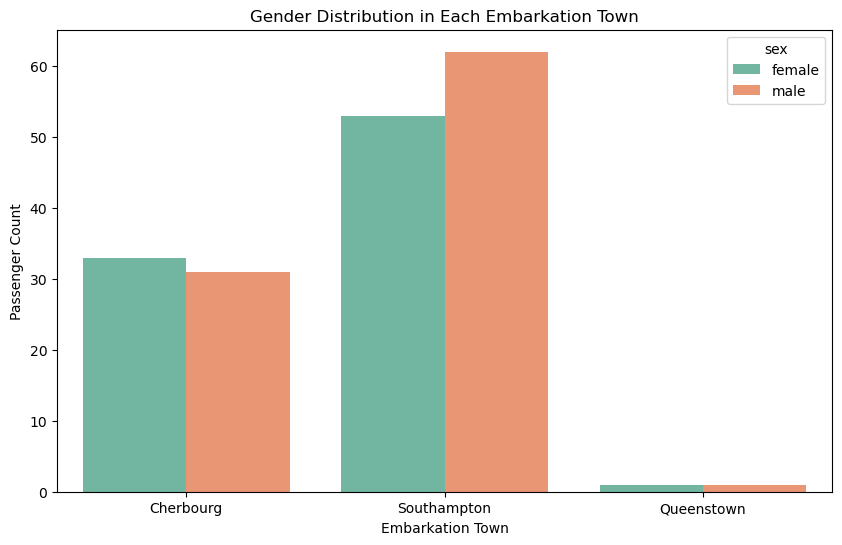

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='embark_town', hue='sex', data=df, palette='Set2')
plt.title('Gender Distribution in Each Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Passenger Count')

plt.show()

Q7. Are passengers with family more common in certain embarkation towns?

C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

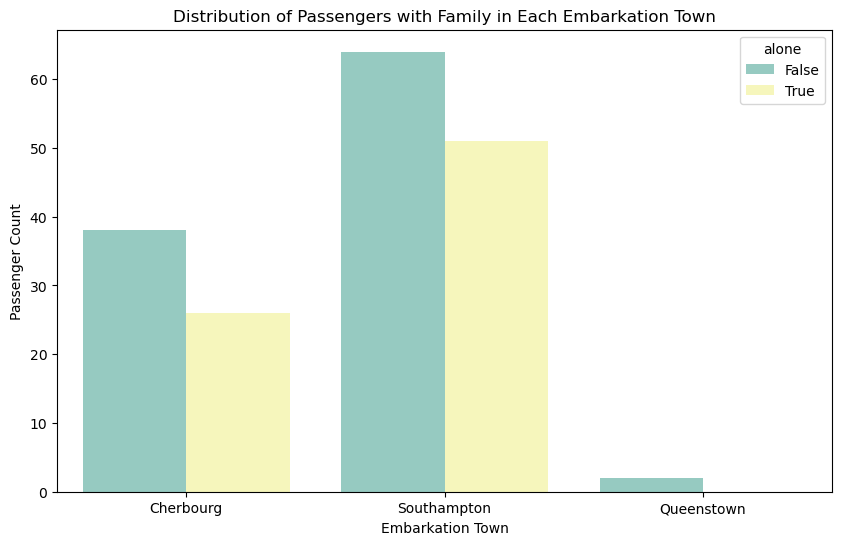

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='embark_town', hue='alone', data=df, palette='Set3')

plt.title('Distribution of Passengers with Family in Each Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Passenger Count')

plt.show()

Q8. What is the distribution of passenger ages on the Titanic?

C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


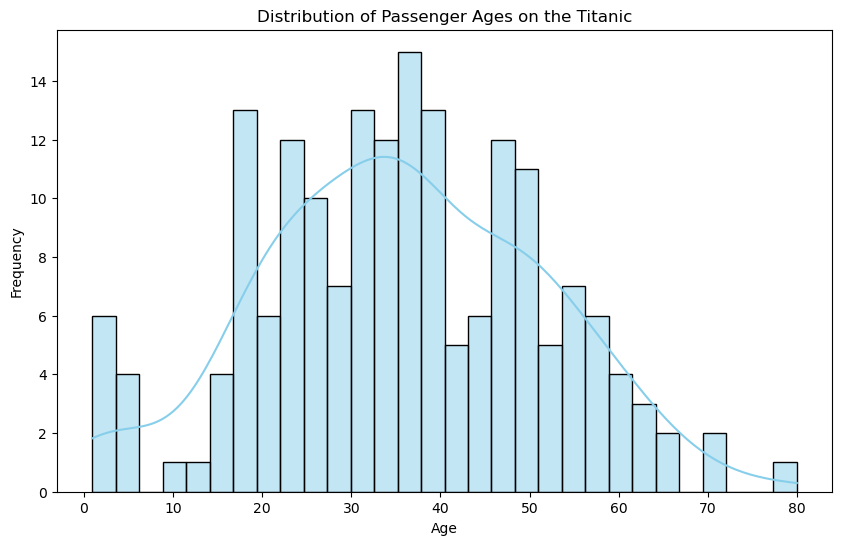

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Passenger Ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Q9. Compare the fare of adult man, women and child.

In [24]:
adult_age = 18

adult_males = df[(df['who'] == 'man') & (df['age'] >= adult_age)]
adult_females = df[(df['who'] == 'woman') & (df['age'] >= adult_age)]
children = df[df['who'] == 'child']

fare_stats_adult_males = adult_males['fare'].describe()
fare_stats_adult_females = adult_females['fare'].describe()
fare_stats_children = children['fare'].describe()

print("Fare Statistics - Adult Males:")
print(fare_stats_adult_males)

print("\nFare Statistics - Adult Females:")
print(fare_stats_adult_females)

print("\nFare Statistics - Children:")
print(fare_stats_children)

Fare Statistics - Adult Males:
count     86.000000
mean      69.343558
std       85.916355
min        0.000000
25%       27.937500
50%       51.931250
75%       78.459375
max      512.329200
Name: fare, dtype: float64

Fare Statistics - Adult Females:
count     76.000000
mean      90.315132
std       68.898766
min       10.462500
25%       47.025000
50%       77.958300
75%      114.956250
max      263.000000
Name: fare, dtype: float64

Fare Statistics - Children:
count     13.000000
mean      77.379485
std       66.582345
min       10.462500
25%       26.000000
50%       39.000000
75%      120.000000
max      211.337500
Name: fare, dtype: float64


Q10. Are there more males traveling alone than females?

In [25]:
male_alone_count = df[(df['sex'] == 'male') & (df['alone'] == True)].shape[0]
female_alone_count = df[(df['sex'] == 'female') & (df['alone'] == True)].shape[0]

if male_alone_count > female_alone_count:
    print("Males traveling alone are more numerous than females.")
elif male_alone_count < female_alone_count:
    print("Females traveling alone are more numerous than males.")
else:
    print("The number of males and females traveling alone is equal.")

Males traveling alone are more numerous than females.


# ThankYou